**Introduction and Selecting Reddit Post**

In [1]:
#import libraries
!pip install praw
import praw
import requests
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.7 MB/s eta 0:00:00


In [2]:
# Passing my details
reddit = praw.Reddit(client_id='rd99q4H5_Pnzf-BYAaxW2w',
                     client_secret='yTPmN5RrdBZslRvZD0d98N214iL9LQ',
                     user_agent='WebScrapping')

In [3]:
# getting url of the desired post
url = "https://www.reddit.com/r/news/comments/18akxo0/israel_orders_more_gazans_to_flee_bombs_areas/"

# creating submission object from the url of the post
submission = reddit.submission(url=url)

In [4]:
# printing the properties of the post
print(submission.id)

# getting comment_forest
print(submission.comments)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



18akxo0


In [5]:
# loading MoreComments library to excavate the comments from the post
from praw.models import MoreComments

# initializing empty list of comments from post, setting count to 0
post_comments = []
count = 0

# for loop to append all the post comments into the empty list
for comment in submission.comments:
  if isinstance(comment, MoreComments):
    continue
  post_comments.append(comment.body)

# creating dataframe of all the comments from the list
comments_data = pd.DataFrame(post_comments, columns=['comment'])
comments_data

,comment
0,>As many as 80% of Gaza's 2.3 million people h...
1,Now Israel has published [a map](https://www.t...
2,Aren't all the ways in and out controlled?\n\n...
3,[removed]
4,The last few months are creating lifetimes of ...
...,...
61,Fuck Hamas and fuck the Israeli government. B...
62,Isreal and the US aren't the good guys
63,Uh oh. An article speaking the truth about the...
64,"Title is ""Israel presses ground offensive in s..."


In [6]:
# ensuring I get all the comments from comments as well (comment replies, etc.)
post_comments = []

# including all the morecomments- comments,replies, nested comments and replies
submission.comments.replace_more(limit=None)

# looping through submission.comments.list() will return comments and their replies
for comment in submission.comments.list():
  post_comments.append([comment.body, comment.ups, comment.downs, comment.created])

# creating dataframe
comments_data = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'created'])
comments_data

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,comment,ups,downs,created
0,>As many as 80% of Gaza's 2.3 million people h...,3084,0,1.701706e+09
1,Now Israel has published [a map](https://www.t...,4573,0,1.701704e+09
2,Aren't all the ways in and out controlled?\n\n...,766,0,1.701707e+09
3,[removed],512,0,1.701701e+09
4,The last few months are creating lifetimes of ...,1075,0,1.701705e+09
...,...,...,...,...
2668,[removed],2,0,1.701713e+09
2669,You stated that the settlements are a complica...,1,0,1.701713e+09
2670,[removed],0,0,1.701717e+09
2671,"Dude, follow along your own argument. Are all ...",1,0,1.701714e+09


In [7]:
# checking shape of comments data
comments_data.shape

(2673, 4)

In [8]:
# importting datetime library
from datetime import datetime

# making "created" column human readable by converting seconds since 1/1/1970 to standard year-month-date and time
comments_data['date_time'] = pd.to_datetime(comments_data['created'],  unit='s')
comments_data['date'] = comments_data['date_time'].dt.strftime('%Y-%m-%d')

comments_data.head()

,comment,ups,downs,created,date_time,date
0,>As many as 80% of Gaza's 2.3 million people h...,3084,0,1.701706e+09,2023-12-04 16:03:37,2023-12-04
1,Now Israel has published [a map](https://www.t...,4573,0,1.701704e+09,2023-12-04 15:27:47,2023-12-04
2,Aren't all the ways in and out controlled?\n\n...,766,0,1.701707e+09,2023-12-04 16:30:02,2023-12-04
3,[removed],512,0,1.701701e+09,2023-12-04 14:46:03,2023-12-04
4,The last few months are creating lifetimes of ...,1075,0,1.701705e+09,2023-12-04 15:54:56,2023-12-04


In [9]:
# removing duplicate comments and saving comments data to csv file
comments_data_final = comments_data
comments_data_final.drop_duplicates(subset='comment', keep='last', inplace=True)
comments_data_final.to_csv('israel_palestine_comments.csv', index=True, header=True)
comments_data_final.shape

(2301, 6)

**Sentiment Analysis**

In [10]:
# importing seaborn library
import seaborn as sns

# importing the comments data from the selected post as csv
reddit_data = pd.read_csv('israel_palestine_comments.csv')
reddit_data.head(20)

,Unnamed: 0,comment,ups,downs,created,date_time,date
0,0,>As many as 80% of Gaza's 2.3 million people h...,3084,0,1.701706e+09,2023-12-04 16:03:37,2023-12-04
1,1,Now Israel has published [a map](https://www.t...,4573,0,1.701704e+09,2023-12-04 15:27:47,2023-12-04
2,2,Aren't all the ways in and out controlled?\n\n...,766,0,1.701707e+09,2023-12-04 16:30:02,2023-12-04
3,4,The last few months are creating lifetimes of ...,1075,0,1.701705e+09,2023-12-04 15:54:56,2023-12-04
4,5,>A dead toddler's bare feet and black trousers...,589,0,1.701702e+09,2023-12-04 15:02:38,2023-12-04
5,7,"The Israeli president, Herzog, is on record sa...",912,0,1.701709e+09,2023-12-04 16:49:43,2023-12-04
6,8,Even if you think Hamas is wrong in what they'...,3124,0,1.701703e+09,2023-12-04 15:14:04,2023-12-04
7,9,> ... residents and journalists on the ground ...,15,0,1.701716e+09,2023-12-04 18:52:04,2023-12-04
8,10,Didn't everyone predict exactly this???,65,0,1.701715e+09,2023-12-04 18:38:56,2023-12-04
9,12,I am getting so much whiplash from the headlin...,819,0,1.701703e+09,2023-12-04 15:13:28,2023-12-04


**Data Pre-Processing**

In [11]:
# checking columns
reddit_data.columns

Index(['Unnamed: 0', 'comment', 'ups', 'downs', 'created', 'date_time',
       'date'],
      dtype='object')

In [12]:
# dropping unnecessary columns
reddit_data = reddit_data.drop(columns = ['Unnamed: 0', 'downs'], axis = 1)
reddit_data.head()

,comment,ups,created,date_time,date
0,>As many as 80% of Gaza's 2.3 million people h...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04
1,Now Israel has published [a map](https://www.t...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04
2,Aren't all the ways in and out controlled?\n\n...,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04
3,The last few months are creating lifetimes of ...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04
4,>A dead toddler's bare feet and black trousers...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04


In [13]:
# importing all the necessary libraries to help remove the unnecessary stopwords and symbols from comments
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# creating the function that will pass through all the comments and remove the desired stopwords and symbols
def reddit_clean (redd):
    redd = str(redd).lower()

    redd = re.sub("'", "", redd)
    redd = re.sub("@[A-Za-z0-9_]+","", redd)
    redd = re.sub("#[A-Za-z0-9_]+","", redd)
    redd = re.sub(r"www.\S+", "", redd)
    redd = re.sub(r"http\S+", "", redd)
    redd = re.sub('[()!?]', ' ', redd)
    redd = re.sub('\[.*?\]',' ', redd)
    redd = re.sub("[^a-z0-9]"," ", redd)
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)

    redd = redd.split()

    stopwords = STOPWORDS
    redd = [w for w in redd if not w in stopwords] # using list comprehension makes the process more efficient

    redd = " ".join(word for word in redd)

    return redd

In [15]:
# applying the previously created function to the data to clean it of the unnecessary words/symbols
reddit_data['comment'] = reddit_data['comment'].apply(reddit_clean)
reddit_data.head()

,comment,ups,created,date_time,date
0,many gazas million people fled homes something...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04
1,israel published splits gaza 100s zones today ...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04
2,arent ways controlled exactly flee,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04
3,last months creating lifetimes fanatics hate b...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04
4,dead toddlers bare feet black trousers poked p...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04


**Tokenizing the Comments**

In [16]:
# splitting comments into individual words so that it is easier to process (tokenization)
tokenized_post = reddit_data['comment'].apply(lambda x: x.split())
tokenized_post

0       [many, gazas, million, people, fled, homes, so...
1       [israel, published, splits, gaza, 100s, zones,...
2                [arent, ways, controlled, exactly, flee]
3       [last, months, creating, lifetimes, fanatics, ...
4       [dead, toddlers, bare, feet, black, trousers, ...
                              ...                        
2296    [settlers, killing, people, would, fall, secon...
2297    [stated, settlements, complicated, issue, tell...
2298                                                   []
2299    [dude, follow, along, argument, settlers, murd...
2300    [never, said, murders, baby, killers, said, ev...
Name: comment, Length: 2301, dtype: object

In [17]:
# importing PortStemmer to stem the long-form words in the comments
from nltk.stem import PorterStemmer

# creating instance of PorterStemmer to access the functions
stemmer = PorterStemmer()

# applying stem function to i, which is one word inside x
tokenized_post = tokenized_post.apply(lambda x: [stemmer.stem(i) for i in x])
reddit_data['tokenized']= tokenized_post
reddit_data.head()

,comment,ups,created,date_time,date,tokenized
0,many gazas million people fled homes something...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04,"[mani, gaza, million, peopl, fled, home, somet..."
1,israel published splits gaza 100s zones today ...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04,"[israel, publish, split, gaza, 100, zone, toda..."
2,arent ways controlled exactly flee,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04,"[arent, way, control, exactli, flee]"
3,last months creating lifetimes fanatics hate b...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04,"[last, month, creat, lifetim, fanat, hate, beg..."
4,dead toddlers bare feet black trousers poked p...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04,"[dead, toddler, bare, feet, black, trouser, po..."


**Word Cloud Creation**

In [18]:
# importing necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

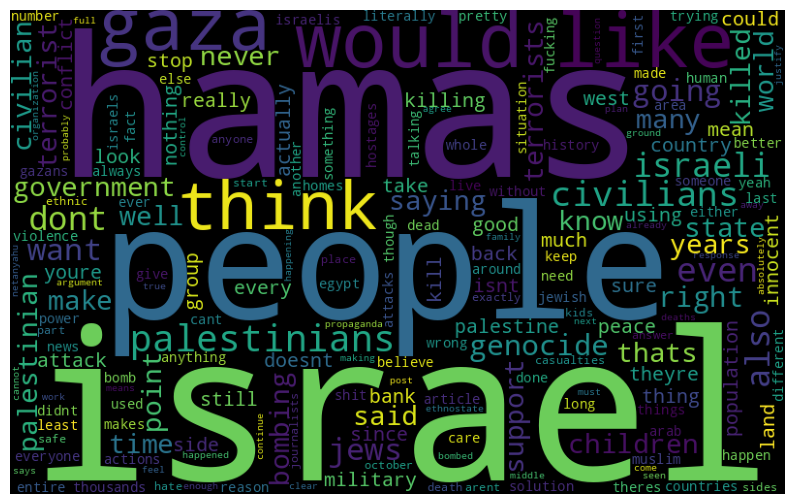

In [19]:
# looping through all comments and joining by space
all_words = ' '.join([text for text in reddit_data['comment']])

# counts each word in all_words, stores it as dictionary
word_count = collections.Counter(all_words.split())

# creating wordcloud with specified dimensions
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# importing necessary libraries
import itertools
import collections

# getting counts of the most common words
word_count = collections.Counter(all_words.split())
word_count.most_common(15)

[('israel', 1098),
 ('hamas', 988),
 ('people', 620),
 ('would', 356),
 ('gaza', 341),
 ('like', 340),
 ('palestinians', 311),
 ('think', 267),
 ('civilians', 243),
 ('israeli', 236),
 ('even', 234),
 ('jews', 221),
 ('also', 215),
 ('dont', 210),
 ('want', 181)]

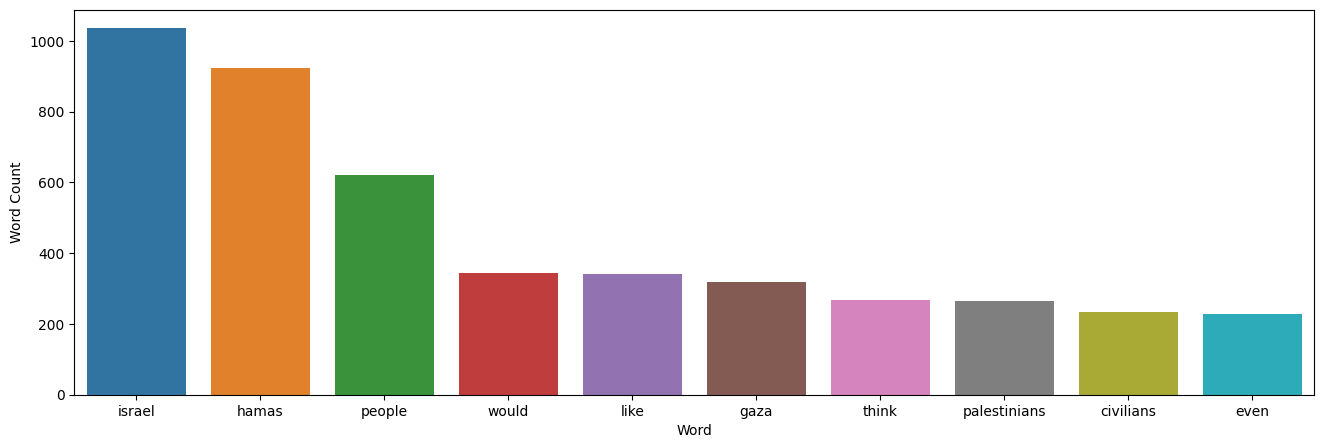

In [22]:
# making bar chart of the top 10 neutral words

a = nltk.FreqDist(word_count)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most common words
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Word Count')
plt.show()

**Sentiment Analysis with Textblob**

In [23]:
# importing textblob library
from textblob import TextBlob

# creating functions to get the polarity and subjectivity of the comments

def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

In [24]:
# applying the above functions to the comments to get the parameters for each comment in the post
reddit_data['polarity'] = reddit_data['comment'].apply(get_polarity)
reddit_data['subjectivity'] = reddit_data['comment'].apply(get_subjectivity)
reddit_data.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity
0,many gazas million people fled homes something...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04,"[mani, gaza, million, peopl, fled, home, somet...",0.500000,0.500000
1,israel published splits gaza 100s zones today ...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04,"[israel, publish, split, gaza, 100, zone, toda...",0.500000,0.888889
2,arent ways controlled exactly flee,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04,"[arent, way, control, exactli, flee]",0.250000,0.250000
3,last months creating lifetimes fanatics hate b...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04,"[last, month, creat, lifetim, fanat, hate, beg...",-0.533333,0.622222
4,dead toddlers bare feet black trousers poked p...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04,"[dead, toddler, bare, feet, black, trouser, po...",-0.036111,0.238889


In [25]:
# creating function to classify polarity easily into the 3 given categories
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [26]:
# applying polarity function on comments
reddit_data['sentiment'] = reddit_data['comment'].apply(analyze_sentiment)
reddit_data.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment
0,many gazas million people fled homes something...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04,"[mani, gaza, million, peopl, fled, home, somet...",0.500000,0.500000,Positive Sentiment
1,israel published splits gaza 100s zones today ...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04,"[israel, publish, split, gaza, 100, zone, toda...",0.500000,0.888889,Positive Sentiment
2,arent ways controlled exactly flee,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04,"[arent, way, control, exactli, flee]",0.250000,0.250000,Positive Sentiment
3,last months creating lifetimes fanatics hate b...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04,"[last, month, creat, lifetim, fanat, hate, beg...",-0.533333,0.622222,Negative Sentiment
4,dead toddlers bare feet black trousers poked p...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04,"[dead, toddler, bare, feet, black, trouser, po...",-0.036111,0.238889,Negative Sentiment


In [27]:
# using np.where to create columb that classifies subjectivity as subjective or objective
reddit_data['subjectivity_binary'] = np.where(reddit_data['subjectivity'] > 0.5, 'Subjective', 'Objective')
reddit_data.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment,subjectivity_binary
0,many gazas million people fled homes something...,3084,1.701706e+09,2023-12-04 16:03:37,2023-12-04,"[mani, gaza, million, peopl, fled, home, somet...",0.500000,0.500000,Positive Sentiment,Objective
1,israel published splits gaza 100s zones today ...,4573,1.701704e+09,2023-12-04 15:27:47,2023-12-04,"[israel, publish, split, gaza, 100, zone, toda...",0.500000,0.888889,Positive Sentiment,Subjective
2,arent ways controlled exactly flee,766,1.701707e+09,2023-12-04 16:30:02,2023-12-04,"[arent, way, control, exactli, flee]",0.250000,0.250000,Positive Sentiment,Objective
3,last months creating lifetimes fanatics hate b...,1075,1.701705e+09,2023-12-04 15:54:56,2023-12-04,"[last, month, creat, lifetim, fanat, hate, beg...",-0.533333,0.622222,Negative Sentiment,Subjective
4,dead toddlers bare feet black trousers poked p...,589,1.701702e+09,2023-12-04 15:02:38,2023-12-04,"[dead, toddler, bare, feet, black, trouser, po...",-0.036111,0.238889,Negative Sentiment,Objective


In [28]:
# getting frequency table/distribution of each category of sentiment
reddit_data['sentiment'].value_counts()

Positive Sentiment    1001
Negative Sentiment     694
Neutral Sentiment      606
Name: sentiment, dtype: int64

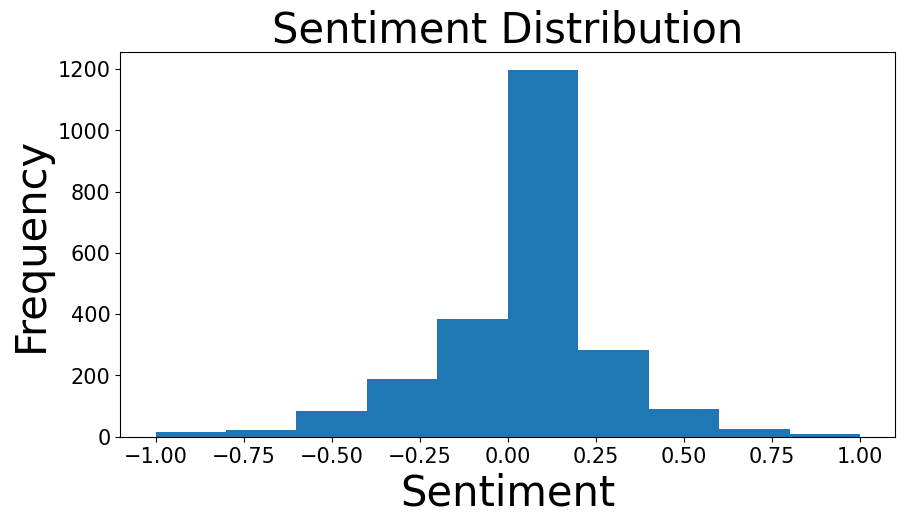

In [29]:
# plotting the frequency distribution of sentiment
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data['polarity'], bins=10)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

In [30]:
#  getting frequency table/distribution of each category of subjectivity
reddit_data.subjectivity_binary.value_counts()

Objective     1505
Subjective     796
Name: subjectivity_binary, dtype: int64

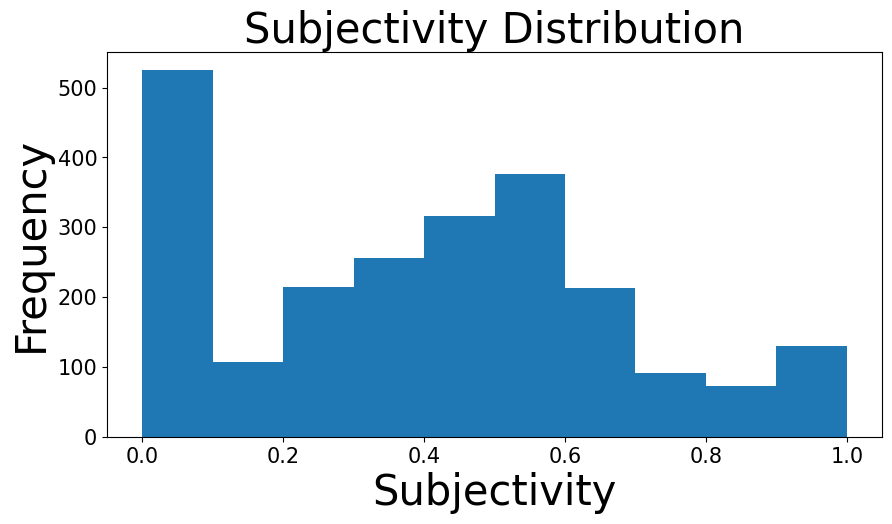

In [31]:
# plotting the frequency distribution of subjectivity
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data['subjectivity'], bins=10)
plt.title('Subjectivity Distribution', fontsize=30)
plt.show()

In [33]:
# running descriptive statistics for polarity and subjecitivity
polarity_subjectivity = reddit_data[["polarity", "subjectivity"]]
polarity_subjectivity.describe()

,polarity,subjectivity
count,2301.000000,2301.000000
mean,0.026997,0.388200
std,0.245113,0.282299
min,-1.000000,0.000000
25%,-0.050000,0.125000
50%,0.000000,0.400000
75%,0.150000,0.577778
max,1.000000,1.000000


In [34]:
# creating crosstab for sentiment and subjectivity by category
pd.crosstab(reddit_data['sentiment'], reddit_data['subjectivity_binary'])

subjectivity_binary,Objective,Subjective
sentiment,,
Negative Sentiment,349,345
Neutral Sentiment,570,36
Positive Sentiment,586,415
